Nesse caderno, comparamos a distância entre estações do metro de duas maneiras: 

- distância geográfica
- tempo de viagem 


In [1]:
import pandas as pd
from io import StringIO
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

Vamos começar carregando a distância geográfica entre 10 estações do metro de Singapura:

In [2]:
tmp = StringIO("""STN_NAME,YISHUN_MRT_STATION,PASIR_RIS_MRT_STATION,JURONG_EAST_MRT_STATION,TUAS_LINK_MRT_STATION,BENCOOLEN_MRT_STATION,PUNGGOL_MRT_STATION,MARINA_BAY_MRT_STATION,DHOBY_GHAUT_MRT_STATION,ROCHOR_MRT_STATION,UPPER_CHANGI_MRT_STATION
YISHUN_MRT_STATION,0,14165.8028309003,14826.8234223324,24144.58370996,14539.8253530485,7955.17551381608,17097.0983148766,14495.1289232166,14014.7715236133,17091.9107945143
PASIR_RIS_MRT_STATION,14165.8028309003,0,23451.9973340811,34950.8745491473,13721.3248153691,6306.08987347808,14983.0092441387,14095.3770091796,13209.4818715068,3712.4090725179
JURONG_EAST_MRT_STATION,14826.8234223324,23451.9973340811,0,11758.6400823558,12613.5429467971,19455.8643741636,14047.8304857995,12175.0907736314,12676.1241992151,24411.4671044188
TUAS_LINK_MRT_STATION,24144.58370996,34950.8745491473,11758.6400823558,0,24202.2573770791,30351.6324743735,25305.1676395598,23749.9738806756,24325.8635170677,36124.0377992668
BENCOOLEN_MRT_STATION,14539.8253530485,13721.3248153691,12613.5429467971,24202.2573770791,0,13024.8987292155,2565.66801256045,461.323513564845,602.910926685915,13240.7330980557
PUNGGOL_MRT_STATION,7955.17551381608,6306.08987347808,19455.8643741636,30351.6324743735,13024.8987292155,0,15129.4446906282,13237.1986125019,12423.6186258471,9588.13908018742
MARINA_BAY_MRT_STATION,17097.0983148766,14983.0092441387,14047.8304857995,25305.1676395598,2565.66801256045,15129.4446906282,0,2695.76728986719,3084.57512743706,13883.5893006481
DHOBY_GHAUT_MRT_STATION,14495.1289232166,14095.3770091796,12175.0907736314,23749.9738806756,461.323513564845,13237.1986125019,2695.76728986719,0,887.79255969772,13673.2848886229
ROCHOR_MRT_STATION,14014.7715236133,13209.4818715068,12676.1241992151,24325.8635170677,602.910926685915,12423.6186258471,3084.57512743706,887.79255969772,0,12836.5477607036
UPPER_CHANGI_MRT_STATION,17091.9107945143,3712.4090725179,24411.4671044188,36124.0377992668,13240.7330980557,9588.13908018742,13883.5893006481,13673.2848886229,12836.5477607036,0""")

distancias = pd.read_csv(tmp,index_col=0)

Podemos visualizar essa matriz de distâncias:

In [3]:
distancias

,YISHUN_MRT_STATION,PASIR_RIS_MRT_STATION,JURONG_EAST_MRT_STATION,TUAS_LINK_MRT_STATION,BENCOOLEN_MRT_STATION,PUNGGOL_MRT_STATION,MARINA_BAY_MRT_STATION,DHOBY_GHAUT_MRT_STATION,ROCHOR_MRT_STATION,UPPER_CHANGI_MRT_STATION
STN_NAME,,,,,,,,,,
YISHUN_MRT_STATION,0.000000,14165.802831,14826.823422,24144.583710,14539.825353,7955.175514,17097.098315,14495.128923,14014.771524,17091.910795
PASIR_RIS_MRT_STATION,14165.802831,0.000000,23451.997334,34950.874549,13721.324815,6306.089873,14983.009244,14095.377009,13209.481872,3712.409073
JURONG_EAST_MRT_STATION,14826.823422,23451.997334,0.000000,11758.640082,12613.542947,19455.864374,14047.830486,12175.090774,12676.124199,24411.467104
TUAS_LINK_MRT_STATION,24144.583710,34950.874549,11758.640082,0.000000,24202.257377,30351.632474,25305.167640,23749.973881,24325.863517,36124.037799
BENCOOLEN_MRT_STATION,14539.825353,13721.324815,12613.542947,24202.257377,0.000000,13024.898729,2565.668013,461.323514,602.910927,13240.733098
PUNGGOL_MRT_STATION,7955.175514,6306.089873,19455.864374,30351.632474,13024.898729,0.000000,15129.444691,13237.198613,12423.618626,9588.139080
MARINA_BAY_MRT_STATION,17097.098315,14983.009244,14047.830486,25305.167640,2565.668013,15129.444691,0.000000,2695.767290,3084.575127,13883.589301
DHOBY_GHAUT_MRT_STATION,14495.128923,14095.377009,12175.090774,23749.973881,461.323514,13237.198613,2695.767290,0.000000,887.792560,13673.284889
ROCHOR_MRT_STATION,14014.771524,13209.481872,12676.124199,24325.863517,602.910927,12423.618626,3084.575127,887.792560,0.000000,12836.547761


Agora vamos considerar o tempo médio de viagem entre essas 10 estações de metro de Singapura:

In [4]:
tmp = StringIO(""" STN_NAME,YISHUN_MRT_STATION,PASIR_RIS_MRT_STATION,JURONG_EAST_MRT_STATION,TUAS_LINK_MRT_STATION,BENCOOLEN_MRT_STATION,PUNGGOL_MRT_STATION,MARINA_BAY_MRT_STATION,DHOBY_GHAUT_MRT_STATION,ROCHOR_MRT_STATION,UPPER_CHANGI_MRT_STATION
YISHUN_MRT_STATION,0,476,2359,707,2347,1944,640,3593,1848,2245
PASIR_RIS_MRT_STATION,476,0,2009,363,1970,1484,334,3219,2173,1820
JURONG_EAST_MRT_STATION,2359,2009,0,1883,3677,3422,2044,1738,3665,2411
TUAS_LINK_MRT_STATION,707,363,1883,0,2169,1848,528,3118,2441,2127
BENCOOLEN_MRT_STATION,2347,1970,3677,2169,0,2599,1819,4912,1334,3734
PUNGGOL_MRT_STATION,1944,1484,3422,1848,2599,0,1552,4632,3174,2194
MARINA_BAY_MRT_STATION,640,334,2044,528,1819,1552,0,3318,1998,1758
DHOBY_GHAUT_MRT_STATION,3593,3219,1738,3118,4912,4632,3318,0,4941,3659
ROCHOR_MRT_STATION,1848,2173,3665,2441,1334,3174,1998,4941,0,3945
UPPER_CHANGI_MRT_STATION,2245,1820,2411,2127,3734,2194,1758,3659,3945,0 """)
tempo_viagem = pd.read_csv(tmp,index_col=0)

Podemos visualizar essa matriz de tempo de viagem

In [5]:
tempo_viagem

,YISHUN_MRT_STATION,PASIR_RIS_MRT_STATION,JURONG_EAST_MRT_STATION,TUAS_LINK_MRT_STATION,BENCOOLEN_MRT_STATION,PUNGGOL_MRT_STATION,MARINA_BAY_MRT_STATION,DHOBY_GHAUT_MRT_STATION,ROCHOR_MRT_STATION,UPPER_CHANGI_MRT_STATION
STN_NAME,,,,,,,,,,
YISHUN_MRT_STATION,0,476,2359,707,2347,1944,640,3593,1848,2245
PASIR_RIS_MRT_STATION,476,0,2009,363,1970,1484,334,3219,2173,1820
JURONG_EAST_MRT_STATION,2359,2009,0,1883,3677,3422,2044,1738,3665,2411
TUAS_LINK_MRT_STATION,707,363,1883,0,2169,1848,528,3118,2441,2127
BENCOOLEN_MRT_STATION,2347,1970,3677,2169,0,2599,1819,4912,1334,3734
PUNGGOL_MRT_STATION,1944,1484,3422,1848,2599,0,1552,4632,3174,2194
MARINA_BAY_MRT_STATION,640,334,2044,528,1819,1552,0,3318,1998,1758
DHOBY_GHAUT_MRT_STATION,3593,3219,1738,3118,4912,4632,3318,0,4941,3659
ROCHOR_MRT_STATION,1848,2173,3665,2441,1334,3174,1998,4941,0,3945


Agora vamos criar a projeção usando o escalonamento multimensional (o parâmetro `random_state` foi inserido para que o resultado seja reprodutível:

In [ ]:
mds = MDS(dissimilarity='precomputed',random_state=42)
mds_distancias = mds.fit_transform(distancias)
mds_tempo_viagem = mds.fit_transform(tempo_viagem)

Agora vamos normalizar essas projeções para que fiquem em uma mesma escala:

In [ ]:
mds_distancias /= mds_distancias.max()
mds_tempo_viagem /= mds_tempo_viagem.max()

E fazer um gráfico bi-dimensional com essas duas projeções:

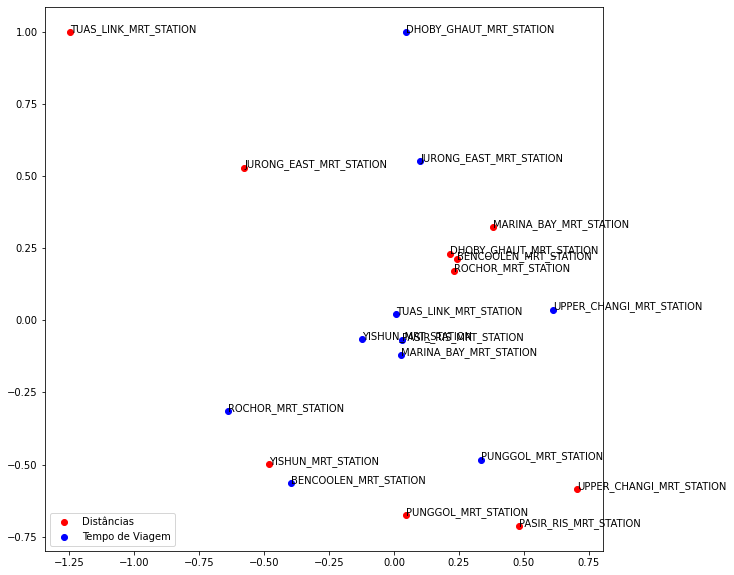

In [ ]:
fig = plt.figure(figsize=(10,10))

plt.scatter(mds_distancias[:,0],mds_distancias[:,1],color = 'red', label="Distâncias")
for i in range(len(mds_distancias)):
  plt.text(mds_distancias[i,0],mds_distancias[i,1],distancias.index[i])

plt.scatter(mds_tempo_viagem[:,0],mds_tempo_viagem[:,1],color = 'blue', label="Tempo de Viagem")
for i in range(len(mds_tempo_viagem)):
  plt.text(mds_tempo_viagem[i,0],mds_tempo_viagem[i,1],tempo_viagem.index[i])

plt.legend(loc='lower left')